In [1]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
!pip install -q xlrd
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error

In [4]:
df = pd.read_csv('/content/household_power_consumption.csv',  parse_dates={'data': ['Date', 'Time']},
                   infer_datetime_format=True,
                   na_values=['nan', '?'],
                   index_col='data')

In [7]:
df.head()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
data,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [8]:
df.tail()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
data,,,,,,,
2007-06-15 04:12:00,0.274,0.228,238.86,1.4,0.0,2.0,0.0
2007-06-15 04:13:00,0.254,0.224,238.87,1.4,0.0,1.0,0.0
2007-06-15 04:14:00,0.272,0.232,239.52,1.4,0.0,2.0,0.0
2007-06-15 04:15:00,0.252,0.228,239.66,1.4,0.0,1.0,0.0
2007-06-15 04:16:00,0.304,0.256,239.38,1.8,0.0,1.0,0.0


In [9]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,256081.000000,256081.000000,256081.000000,256081.000000,256081.000000,256081.000000,256081.000000
mean,1.263828,0.122337,239.307028,5.383292,1.342755,1.715242,6.124035
std,1.232096,0.112100,3.771986,5.208992,6.740296,6.879491,8.287547
min,0.096000,0.000000,223.490000,0.400000,0.000000,0.000000,0.000000
25%,0.310000,0.000000,236.560000,1.400000,0.000000,0.000000,0.000000
50%,0.778000,0.104000,239.630000,3.400000,0.000000,0.000000,0.000000
75%,1.788000,0.190000,242.050000,7.600000,0.000000,1.000000,17.000000
max,10.670000,0.988000,251.700000,46.400000,78.000000,78.000000,20.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 259853 entries, 2006-12-16 17:24:00 to 2007-06-15 04:16:00
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Global_active_power    256081 non-null  float64
 1   Global_reactive_power  256081 non-null  float64
 2   Voltage                256081 non-null  float64
 3   Global_intensity       256081 non-null  float64
 4   Sub_metering_1         256081 non-null  float64
 5   Sub_metering_2         256081 non-null  float64
 6   Sub_metering_3         256081 non-null  float64
dtypes: float64(7)
memory usage: 15.9 MB


In [12]:
df.isna().sum()

Global_active_power      3772
Global_reactive_power    3772
Voltage                  3772
Global_intensity         3772
Sub_metering_1           3772
Sub_metering_2           3772
Sub_metering_3           3772
dtype: int64

In [13]:
data_clear = df.dropna()

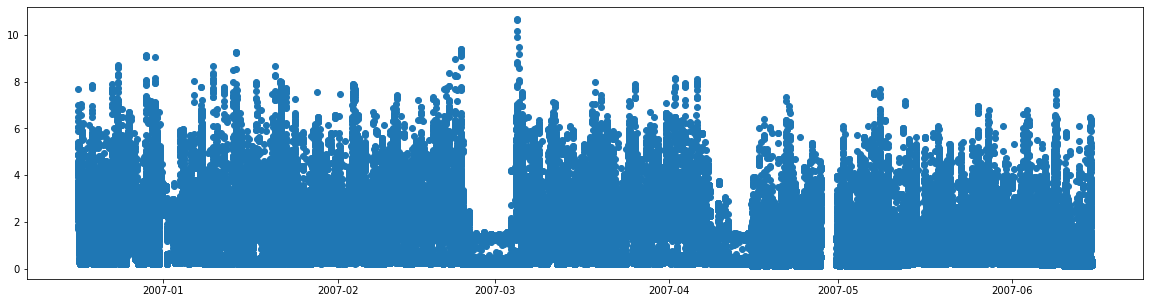

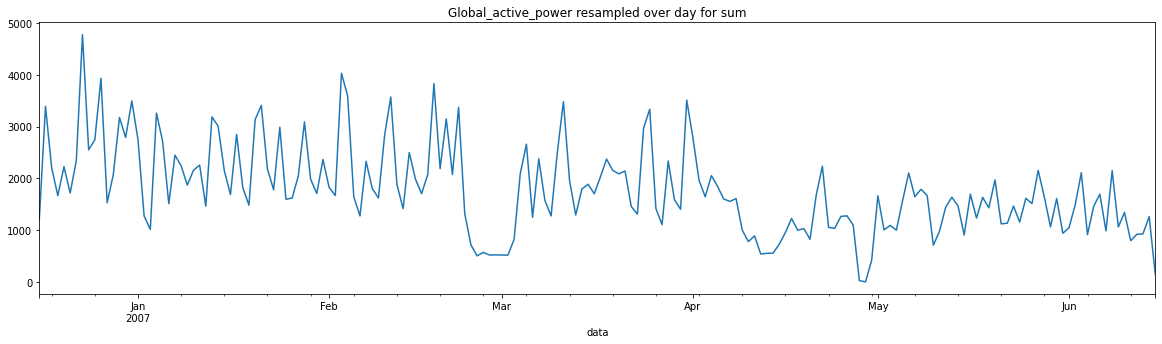

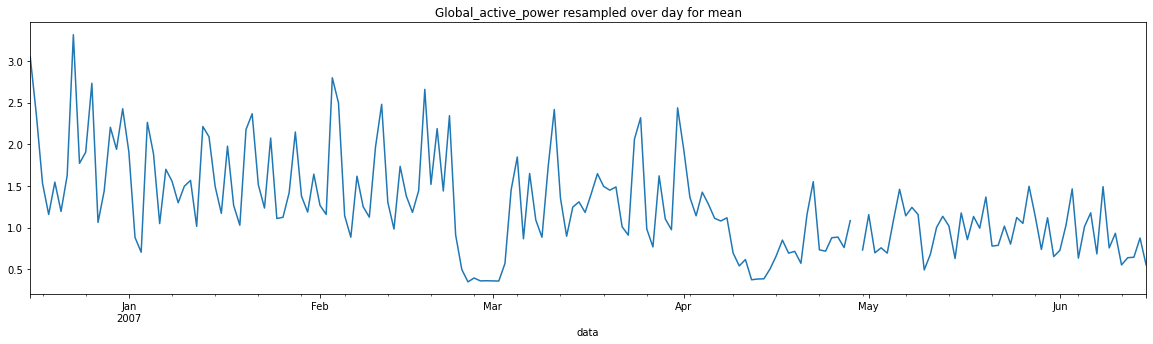

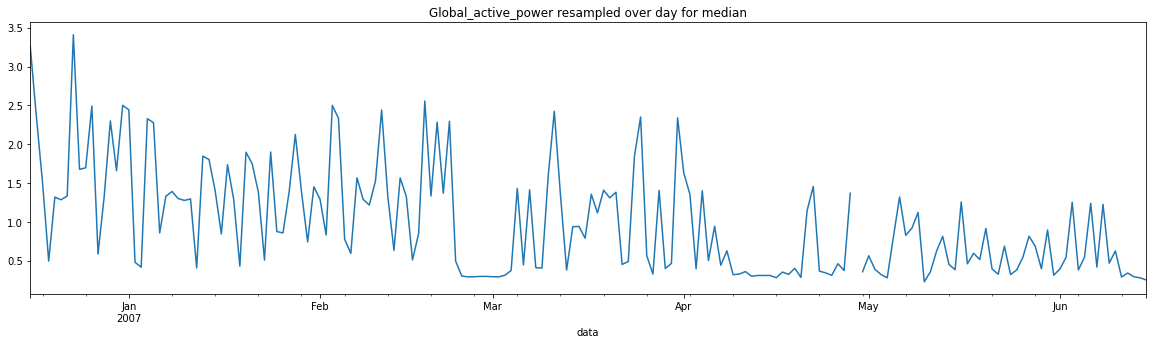

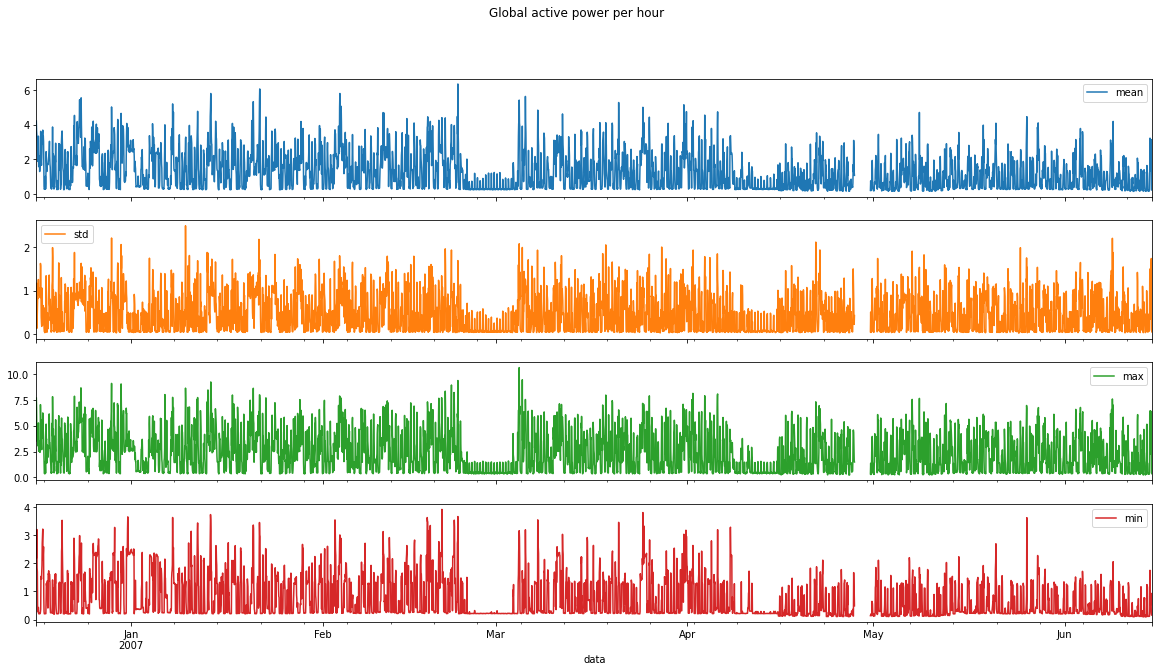

In [14]:
# VISUALIZATION

# Scatter plot of Global_active_power
plt.figure(figsize=(20, 5))
plt.scatter(data_clear.index, data_clear['Global_active_power'])
plt.show()

# Global_active_power resampled over day for sum
plt.figure(figsize=(20, 5))
data_clear.Global_active_power.resample('D').sum().plot(title='Global_active_power resampled over day for sum')
plt.show()

# Global_active_power resampled over day for mean
plt.figure(figsize=(20, 5))
data_clear.Global_active_power.resample('D').mean().plot(title='Global_active_power resampled over day for mean')
plt.show()

# Global_active_power resampled over day for median
plt.figure(figsize=(20, 5))
data_clear.Global_active_power.resample('D').median().plot(title='Global_active_power resampled over day for median')
plt.show()

# Global active power per hour
h = data_clear.Global_active_power.resample('h').agg(['mean', 'std', 'max', 'min'])
h.plot(subplots=True, figsize=(20, 10), title='Global active power per hour')
plt.show()

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
# DATA PREPARATION

# Resampling of data over 30 minutes
data_resample = data_clear.resample('30Min').mean()
data_resample.shape

# Splitting into target variable and feathers
X = data_resample.drop("Global_active_power", axis=1)
X = X.reset_index(drop=True)
X.head()

y = data_resample["Global_active_power"].reset_index(drop=True)
y.head()

# Split data
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=1)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

# Control missing values
xtrain.isna().sum()

xtest.isna().sum()

ytrain.isna().sum()

ytest.isna().sum()

# Drop missing values
xtrain = xtrain.dropna()

xtest = xtest.dropna()

ytrain = ytrain.dropna()

ytest = ytest.dropna()

(6064, 6)
(2599, 6)
(6064,)
(2599,)


In [18]:
from numpy import asarray
from sklearn.preprocessing import StandardScaler

In [19]:
sc = StandardScaler()

In [27]:
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

In [28]:
ann = Sequential()

In [29]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [30]:
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
ann.add(Dense(units=30,activation='relu'))
ann.add(Dense(units=1))
ann.compile(optimizer='adam',loss="mse")
ann.fit(xtrain,ytrain,batch_size=50,epochs=400)
earlystop = EarlyStopping(monitor='mse',mode='min',verbose=1,patience=25)
ypred = ann.predict(xtest)

Epoch 1/400
120/120 [==============================] - 0s 1ms/step - loss: 1.1294
Epoch 2/400
120/120 [==============================] - 0s 1ms/step - loss: 0.1137
Epoch 3/400
120/120 [==============================] - 0s 1ms/step - loss: 0.0438
Epoch 4/400
120/120 [==============================] - 0s 1ms/step - loss: 0.0242
Epoch 5/400
120/120 [==============================] - 0s 1ms/step - loss: 0.0167
Epoch 6/400
120/120 [==============================] - 0s 1ms/step - loss: 0.0126
Epoch 7/400
120/120 [==============================] - 0s 1ms/step - loss: 0.0102
Epoch 8/400
120/120 [==============================] - 0s 1ms/step - loss: 0.0084
Epoch 9/400
120/120 [==============================] - 0s 1ms/step - loss: 0.0070
Epoch 10/400
120/120 [==============================] - 0s 1ms/step - loss: 0.0059
Epoch 11/400
120/120 [==============================] - 0s 1ms/step - loss: 0.0051
Epoch 12/400
120/120 [==============================] - 0s 1ms/step - loss: 0.0044
Epoch 13/400


In [32]:
print(f"MSE:-{mean_squared_error(ytest,ypred)}")
print(f"RMSE:-{np.sqrt(mean_squared_error(ytest,ypred))}")

MSE:-0.0004408206378608214
RMSE:-0.02099572903856452
